In [17]:
pip install yfinance pandas plotly requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [18]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for Tesla
tesla_ticker = "TSLA"

# Get Tesla stock data
tesla_stock = yf.Ticker(tesla_ticker)

# Get historical market data
tesla_stock_data = tesla_stock.history(period="5y")

# Display the first few rows of the data
print(tesla_stock_data.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-08-05 00:00:00-04:00  15.306667  15.424667  15.052000  15.221333   
2019-08-06 00:00:00-04:00  15.458667  15.500000  15.050000  15.383333   
2019-08-07 00:00:00-04:00  15.100000  15.571333  15.053333  15.561333   
2019-08-08 00:00:00-04:00  15.630000  15.986667  15.510000  15.886667   
2019-08-09 00:00:00-04:00  15.736667  15.930667  15.587333  15.667333   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-08-05 00:00:00-04:00  105424500        0.0           0.0  
2019-08-06 00:00:00-04:00   83463000        0.0           0.0  
2019-08-07 00:00:00-04:00   71647500        0.0           0.0  
2019-08-08 00:00:00-04:00   79114500        0.0           0.0  
2019-08-09 00:00:00-04:00   58473000        0.0           0.0  


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send HTTP request
response = requests.get(url)

# Parse the webpage content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the revenue data
tables = soup.find_all('table')
tesla_revenue = None

for table in tables:
    if 'Tesla Quarterly Revenue' in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break

if tesla_revenue is not None:
    # Clean the data
    tesla_revenue.columns = ['Date', 'Revenue']
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

    # Display the first few rows of the revenue data
    print(tesla_revenue.head())
else:
    print("Tesla revenue data not found.")



Tesla revenue data not found.


In [20]:
# Define the ticker symbol for GameStop
gamestop_ticker = "GME"

# Get GameStop stock data
gamestop_stock = yf.Ticker(gamestop_ticker)

# Get historical market data
gamestop_stock_data = gamestop_stock.history(period="5y")

# Display the first few rows of the data
print(gamestop_stock_data.head())



                             Open    High     Low   Close    Volume  \
Date                                                                  
2019-08-05 00:00:00-04:00  0.9300  0.9375  0.8950  0.9275  22727200   
2019-08-06 00:00:00-04:00  0.9325  0.9550  0.9075  0.9525  20629600   
2019-08-07 00:00:00-04:00  0.9350  0.9625  0.9150  0.9525  23424400   
2019-08-08 00:00:00-04:00  0.9600  0.9775  0.9425  0.9725   9226800   
2019-08-09 00:00:00-04:00  0.9575  0.9650  0.8975  0.8975  12317600   

                           Dividends  Stock Splits  
Date                                                
2019-08-05 00:00:00-04:00        0.0           0.0  
2019-08-06 00:00:00-04:00        0.0           0.0  
2019-08-07 00:00:00-04:00        0.0           0.0  
2019-08-08 00:00:00-04:00        0.0           0.0  
2019-08-09 00:00:00-04:00        0.0           0.0  


In [21]:
# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send HTTP request
response = requests.get(url)

# Parse the webpage content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the revenue data
tables = soup.find_all('table')
gamestop_revenue = None

for table in tables:
    if 'GameStop Quarterly Revenue' in str(table):
        gamestop_revenue = pd.read_html(str(table))[0]
        break

if gamestop_revenue is not None:
    # Clean the data
    gamestop_revenue.columns = ['Date', 'Revenue']
    gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
    gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'])

    # Display the first few rows of the revenue data
    print(gamestop_revenue.head())
else:
    print("GameStop revenue data not found.")


GameStop revenue data not found.


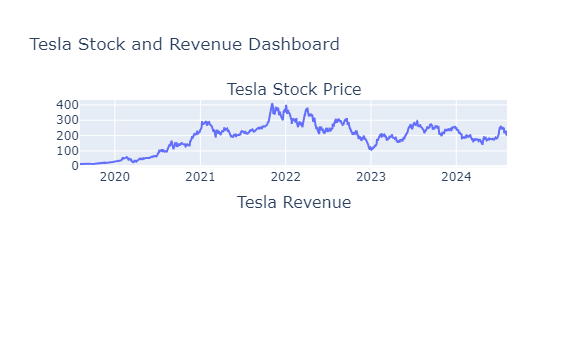

In [22]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplot figure
fig = make_subplots(rows=2, cols=1, subplot_titles=('Tesla Stock Price', 'Tesla Revenue'))

# Add Tesla stock price data
fig.add_trace(
    go.Scatter(x=tesla_stock_data.index, y=tesla_stock_data['Close'], name='Stock Price'),
    row=1, col=1
)

# Add Tesla revenue data
if tesla_revenue is not None:
    fig.add_trace(
        go.Bar(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], name='Revenue'),
        row=2, col=1
    )

# Update layout
fig.update_layout(title_text="Tesla Stock and Revenue Dashboard")

# Show the figure
fig.show()


